# Train Local Model

En este código vamos a entrenar cada miembro del equipo el mismo modelo, cada uno con diferentes datos.

### Librerías

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

### Importar datasets de entrenamiento y prueba

Importamos el dataset de entrenamiento que tocó a cada integrante y el datasets de prueba.

In [35]:
# Cargar datos de entrenamiento y de prueba
data_fold1 = np.load('train_fold1.npz') ####### Modificar número de fold
test_data = np.load('test_data.npz')

In [36]:
# Guardar datos de entrenamiento y prueba en sus variables X y Y
x_train = data_fold1['x']
y_train = data_fold1['y']

x_test = test_data['x']
y_test = test_data['y']

# Mostramos el shape de cada subset
print(f"Entrenamiento  ---> \tX: {x_train.shape}\ty: {y_train.shape}")
print(f"Prueba  ---> \t\tX: {x_test.shape}\ty: {y_test.shape}")

Entrenamiento  ---> 	X: (12000, 28, 28, 1)	y: (12000,)
Prueba  ---> 		X: (10000, 28, 28, 1)	y: (10000,)


### Definición del modelo

In [37]:
def cnn_model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Flatten(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Entrenamiento del modelo

In [38]:
def train_local_model(model, x_train, y_train, x_test, y_test, epochs=20, save_name="model"):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6152 - loss: 1.1404 - val_accuracy: 0.9474 - val_loss: 0.1881
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9231 - loss: 0.2486 - val_accuracy: 0.9664 - val_loss: 0.1192
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9404 - loss: 0.1868 - val_accuracy: 0.9723 - val_loss: 0.0955
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9540 - loss: 0.1439 - val_accuracy: 0.9763 - val_loss: 0.0786
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9577 - loss: 0.1293 - val_accuracy: 0.9796 - val_loss: 0.0667
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9638 - loss: 0.1089 - val_accuracy: 0.9812 - val_loss: 0.0640
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9696 - loss: 0.0981 - val_accuracy: 0.9816 - val_loss: 0.0590
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9656 - loss: 0.0984 - 

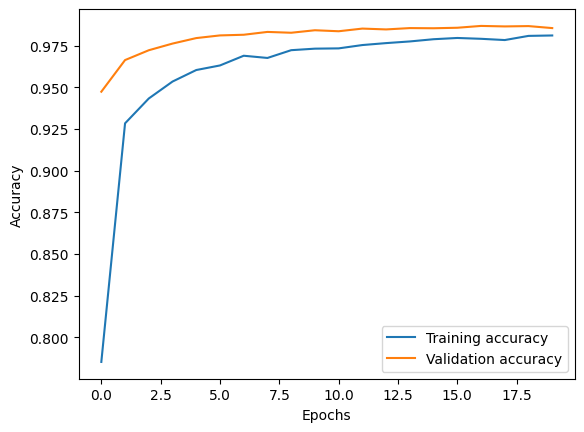

In [39]:
model = cnn_model()
model = train_local_model(model, x_train, y_train, x_test, y_test)

In [40]:
model.save(f'model_fold1.keras') ### Modificar número de fold